In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
import glob
import math
import scipy.stats
from functools import reduce

In [105]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [106]:
path = '/content/gdrive/MyDrive/DataScience/Homeworks/4th/data'

In [107]:
activities = listdir(path)
activities

['walking', 'stairs', 'running', 'idle']

In [108]:
for act in activities:
  file_path = os.path.join(path, act)
  frames = listdir(file_path)
  print(act, len(frames))


walking 1850
stairs 165
running 3408
idle 1039


## Data for "walking" + time domain features

In [109]:
frames = listdir(os.path.join(path, 'walking'))
frame = pd.read_csv(os.path.join(os.path.join(path, 'walking'), frames[10]))
frame

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,-0.478840,-12.162544,-1.484405
1,-0.215478,-1.326388,0.617704
2,-1.537077,-8.461109,0.100556
3,2.121263,-8.489840,1.283292
4,-4.122815,-7.728483,1.546654
5,-11.439496,-15.030798,6.354212
6,-9.208099,-20.561403,3.979163
7,-4.347870,-12.320562,-3.481169
8,1.977611,-1.580173,15.801731
9,-4.520252,-12.330139,-3.778050


In [110]:
frame.shape

(30, 3)

- MCE: $$H(X) = -Σ P(x) log2(P(x))$$

In [111]:
path = '/content/gdrive/MyDrive/DataScience/Homeworks/4th/data/'

file_pattern = f'{path}walking/walking-*.csv'
csv_files = glob.glob(file_pattern)

df_walking = pd.DataFrame()

for file in csv_files:
  if file.endswith('.csv'):
    data = pd.read_csv(file)

    feature_dict = {
        'x-max': data.iloc[:, 0].max(),
        'x-min': data.iloc[:, 0].min(),
        'x-var': data.iloc[:, 0].var(),
        'x-std': data.iloc[:, 0].std(),
        'x-mdn': data.iloc[:, 0].median(),
        'x-rms': np.sqrt(np.mean(data.iloc[:, 0]**2)),
        'x-MCE': -(data.iloc[:, 0].value_counts(normalize=True)*data.iloc[:, 0].value_counts(normalize=True).apply(lambda x:math.log2(x))).sum(),
        'x-skew': scipy.stats.skew(data.iloc[:,0]),
        'x-iqr': scipy.stats.iqr(data.iloc[:,0]),
        'y-max': data.iloc[:, 1].max(),
        'y-min': data.iloc[:, 1].min(),
        'y-var': data.iloc[:, 1].var(),
        'y-std': data.iloc[:, 1].std(),
        'y-mdn': data.iloc[:, 1].median(),
        'y-rms': np.sqrt(np.mean(data.iloc[:, 1]**2)),
        'y-MCE': -(data.iloc[:, 1].value_counts(normalize=True)*data.iloc[:, 1].value_counts(normalize=True).apply(lambda x:math.log2(x))).sum(),
        'y-skew': scipy.stats.skew(data.iloc[:,1]),
        'y-iqr': scipy.stats.iqr(data.iloc[:,1]),
        'z-skew': data.iloc[:, 2].skew(),
        'Field': 1

    }

    df_features = pd.DataFrame(feature_dict, index=[0])
    df_walking = pd.concat([df_walking, df_features], ignore_index=True)

df_walking.head()

,x-max,x-min,x-var,x-std,x-mdn,x-rms,x-MCE,x-skew,x-iqr,y-max,y-min,y-var,y-std,y-mdn,y-rms,y-MCE,y-skew,y-iqr,z-skew,Field
0,7.972692,-11.319786,16.207765,4.025887,-0.316034,3.981301,4.906891,-0.163666,4.214992,7.809886,-25.823860,53.977018,7.346905,-9.868899,12.207731,4.840224,0.024940,9.440338,0.405362,1
1,6.588843,-17.266985,29.958438,5.473430,-2.928109,6.879914,4.906891,-0.747639,6.075286,4.620809,-21.327547,36.319012,6.026526,-11.805808,12.158922,4.906891,0.683353,7.830237,1.572404,1
2,8.566454,-21.485565,25.774353,5.076845,0.603339,5.002133,4.906891,-2.250199,4.909311,6.239290,-24.267628,44.159423,6.645256,-9.270349,12.043921,4.906891,0.024413,8.505402,0.572727,1
3,12.952631,-21.485565,33.955637,5.827147,-1.084574,5.739636,4.906891,-1.091620,6.329071,6.239290,-25.014620,41.864963,6.470314,-10.366894,12.209017,4.906891,0.139729,7.480683,-1.257780,1
4,1.106121,-9.002198,8.234284,2.869544,-2.602497,4.178676,4.840224,-0.388452,4.718972,-2.154781,-21.356280,20.861634,4.567454,-9.507375,10.971740,4.906891,-0.245861,5.284004,-0.668355,1


In [112]:
df_walking.shape

(1850, 20)

##Data for "running" + time domain features

In [113]:
path = '/content/gdrive/MyDrive/DataScience/Homeworks/4th/data/'

file_pattern = f'{path}running/running-*.csv'
csv_files = glob.glob(file_pattern) # list of paths for patterns -1.scv

df_running = pd.DataFrame()

for file in csv_files:
  if file.endswith('.csv'):
    data = pd.read_csv(file)


    feature_dict ={
        'x-max': data.iloc[:, 0].max(),
        'x-min': data.iloc[:, 0].min(),
        'x-var': data.iloc[:, 0].var(),
        'x-std': data.iloc[:, 0].std(),
        'x-mdn': data.iloc[:, 0].median(),
        'x-rms': np.sqrt(np.mean(data.iloc[:, 0]**2)),
        'x-MCE': -(data.iloc[:, 0].value_counts(normalize=True)*data.iloc[:, 0].value_counts(normalize=True).apply(lambda x:math.log2(x))).sum(),
        'x-skew': scipy.stats.skew(data.iloc[:,0]),
        'x-iqr': scipy.stats.iqr(data.iloc[:,0]),
        'y-max': data.iloc[:, 1].max(),
        'y-min': data.iloc[:, 1].min(),
        'y-var': data.iloc[:, 1].var(),
        'y-std': data.iloc[:, 1].std(),
        'y-mdn': data.iloc[:, 1].median(),
        'y-rms': np.sqrt(np.mean(data.iloc[:, 1]**2)),
        'y-MCE': -(data.iloc[:, 1].value_counts(normalize=True)*data.iloc[:, 1].value_counts(normalize=True).apply(lambda x:math.log2(x))).sum(),
        'y-skew': scipy.stats.skew(data.iloc[:,1]),
        'y-iqr': scipy.stats.iqr(data.iloc[:,1]),
        'z-skew': data.iloc[:, 2].skew(),
        'Field': 2
    }

    df_features = pd.DataFrame(feature_dict, index=[0])
    df_running = pd.concat([df_running, df_features], ignore_index=True)

df_running.head()

,x-max,x-min,x-var,x-std,x-mdn,x-rms,x-MCE,x-skew,x-iqr,y-max,y-min,y-var,y-std,y-mdn,y-rms,y-MCE,y-skew,y-iqr,z-skew,Field
0,15.567100,-8.130708,35.674329,5.972799,2.937685,6.667067,4.906891,-0.144999,9.382877,31.335312,-14.245501,178.751233,13.369788,8.058883,15.463741,4.906891,0.104703,21.894973,0.572817,2
1,28.562826,-6.019023,93.214922,9.654788,1.570596,10.875677,4.906891,1.235417,9.333795,31.991323,-13.273455,168.817375,12.992974,6.873753,14.682597,4.906891,0.049224,17.859547,0.776921,2
2,37.703888,-6.110002,111.944568,10.580386,2.430115,11.925570,4.906891,1.644394,7.159861,24.195803,-12.660539,82.810669,9.100037,7.216124,10.304556,4.906891,-0.046184,10.356120,1.562348,2
3,30.521284,-9.370906,76.012152,8.718495,3.141192,9.644280,4.906891,1.202614,11.112687,34.093433,-18.296490,230.906635,15.195612,3.375825,15.956768,4.906891,0.443102,21.796812,0.254628,2
4,36.181175,-7.599196,111.541313,10.561312,8.446744,14.364762,4.906891,0.487009,16.853983,31.469387,-20.025103,147.384702,12.140210,9.323021,14.225219,4.906891,-0.396275,14.672865,1.517986,2


In [114]:
df_running.shape

(3408, 20)

##Data for "stairs" + time domain features

In [63]:
path = '/content/gdrive/MyDrive/DataScience/Homeworks/4th/data/'

file_pattern = f'{path}stairs/stairs-*.csv'
csv_files = glob.glob(file_pattern) # list of paths for patterns -1.scv

df_stairs = pd.DataFrame()

for file in csv_files:
  if file.endswith('.csv'):
    data = pd.read_csv(file)

    features_dict = {
        'x-max': data.iloc[:, 0].max(),
        'x-min': data.iloc[:, 0].min(),
        'x-var': data.iloc[:, 0].var(),
        'x-std': data.iloc[:, 0].std(),
        'x-mdn': data.iloc[:, 0].median(),
        'x-rms': np.sqrt(np.mean(data.iloc[:, 0]**2)),
        'x-MCE': -(data.iloc[:, 0].value_counts(normalize=True)*data.iloc[:, 0].value_counts(normalize=True).apply(lambda x:math.log2(x))).sum(),
        'x-skew': scipy.stats.skew(data.iloc[:,0]),
        'x-iqr': scipy.stats.iqr(data.iloc[:,0]),
        'y-max': data.iloc[:, 1].max(),
        'y-min': data.iloc[:, 1].min(),
        'y-var': data.iloc[:, 1].var(),
        'y-std': data.iloc[:, 1].std(),
        'y-mdn': data.iloc[:, 1].median(),
        'y-rms': np.sqrt(np.mean(data.iloc[:, 1]**2)),
        'y-MCE': -(data.iloc[:, 1].value_counts(normalize=True)*data.iloc[:, 1].value_counts(normalize=True).apply(lambda x:math.log2(x))).sum(),
        'y-skew': scipy.stats.skew(data.iloc[:,1]),
        'y-iqr': scipy.stats.iqr(data.iloc[:,1]),
        'z-skew': data.iloc[:, 2].skew(),
        'Field': 3
    }

    df_features = pd.DataFrame(feature_dict, index=[0])
    df_stairs = pd.concat([df_stairs, df_features], ignore_index=True)

df_stairs.head()

,x-max,x-min,x-var,x-std,x-mdn,x-rms,x-MCE,x-skew,x-iqr,y-max,y-min,y-var,y-std,y-mdn,y-rms,y-MCE,y-skew,y-iqr,z-skew,Field
0,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2
1,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2
2,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2
3,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2
4,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2


In [115]:
df_stairs.shape

(165, 20)

##Data for "idle" + time domain features

In [65]:
path = '/content/gdrive/MyDrive/DataScience/Homeworks/4th/data/'

file_pattern = f'{path}idle/idle-*.csv'
csv_files = glob.glob(file_pattern) # list of paths for patterns -1.scv

df_idle = pd.DataFrame()

for file in csv_files:
  if file.endswith('.csv'):
    data = pd.read_csv(file)

    features_dict = {
        'x-max': data.iloc[:, 0].max(),
        'x-min': data.iloc[:, 0].min(),
        'x-var': data.iloc[:, 0].var(),
        'x-std': data.iloc[:, 0].std(),
        'x-mdn': data.iloc[:, 0].median(),
        'x-rms': np.sqrt(np.mean(data.iloc[:, 0]**2)),
        'x-MCE': -(data.iloc[:, 0].value_counts(normalize=True)*data.iloc[:, 0].value_counts(normalize=True).apply(lambda x:math.log2(x))).sum(),
        'x-skew': scipy.stats.skew(data.iloc[:,0]),
        'x-iqr': scipy.stats.iqr(data.iloc[:,0]),
        'y-max': data.iloc[:, 1].max(),
        'y-min': data.iloc[:, 1].min(),
        'y-var': data.iloc[:, 1].var(),
        'y-std': data.iloc[:, 1].std(),
        'y-mdn': data.iloc[:, 1].median(),
        'y-rms': np.sqrt(np.mean(data.iloc[:, 1]**2)),
        'y-MCE': -(data.iloc[:, 1].value_counts(normalize=True)*data.iloc[:, 1].value_counts(normalize=True).apply(lambda x:math.log2(x))).sum(),
        'y-skew': scipy.stats.skew(data.iloc[:,1]),
        'y-iqr': scipy.stats.iqr(data.iloc[:,1]),
        'z-skew': data.iloc[:, 2].skew(),
        'Field': 4
    }

    df_features = pd.DataFrame(feature_dict, index=[0])
    df_idle = pd.concat([df_idle, df_features], ignore_index=True)

df_idle.head()

,x-max,x-min,x-var,x-std,x-mdn,x-rms,x-MCE,x-skew,x-iqr,y-max,y-min,y-var,y-std,y-mdn,y-rms,y-MCE,y-skew,y-iqr,z-skew,Field
0,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2
1,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2
2,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2
3,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2
4,28.146235,-27.763163,123.11589,11.09576,3.442862,11.963818,4.840224,-0.297029,12.735956,30.89478,-5.746084,112.569927,10.609898,8.248025,13.824643,4.906891,0.477301,13.735535,-0.215187,2


In [116]:
df_idle.shape

(1039, 20)

##Compile all df into one:

In [ ]:
data_frames = [df_running, df_walking, df_stairs, df_idle]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Field'],
                                            how='outer'), data_frames)

df_merged.shape

In [117]:
df_merged = pd.concat([df_idle, df_running, df_stairs, df_walking], ignore_index=True)
df_merged.shape

(6462, 20)

##Dividing Data into Train/Test Sets

In [118]:
X = df_merged.drop('Field', axis=1)
y = df_merged[['Field']].to_numpy()

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [120]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 4523 samples for training and 1939 samples for testing.


##Training the Model

###SVM classifier:



In [121]:
from sklearn import svm

classifier = svm.SVC(decision_function_shape='ovo', kernel='rbf', gamma='auto', probability=True)

In [122]:
classifier.fit(X_train, y_train.ravel())

SVC(decision_function_shape='ovo', gamma='auto', probability=True)

In [123]:
x_dec = classifier.decision_function(X)
x_dec

array([ 1.00015948,  1.00015948,  1.00015948, ..., -0.17221979,
       -1.61354288, -0.96074208])

In [124]:
x_prob = classifier.predict_proba(X)
x_prob

array([[1.27865771e-10, 1.00000000e+00],
       [1.27865771e-10, 1.00000000e+00],
       [1.27865771e-10, 1.00000000e+00],
       ...,
       [9.99999900e-01, 1.00000010e-07],
       [9.99999900e-01, 1.00000010e-07],
       [9.99999900e-01, 1.00000010e-07]])

In [125]:
classifier.score(X, y, sample_weight=None)

0.9964407304240174

In [126]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 2, ..., 1, 2, 2])

              precision    recall  f1-score   support

           1       1.00      0.96      0.98       537
           2       0.98      1.00      0.99      1402

    accuracy                           0.99      1939
   macro avg       0.99      0.98      0.98      1939
weighted avg       0.99      0.99      0.99      1939



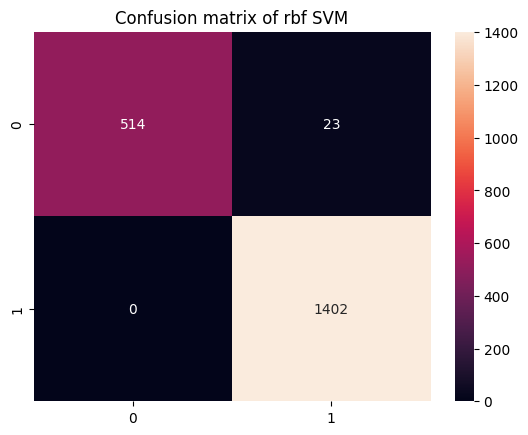

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of rbf SVM')

print(classification_report(y_test, y_pred))

**Outcome**:
- 514 were correctly classified, and there were 23 false positives, 
- while for 1402 class 1 samples, there were 0 false negatives and with all true positives.
-----------
- for class 1 - 1 recall
- for class 0 - 0.99 recall
----------
- but the presision for 0 is 1 and for class 1 is .98, which is a bit questionable. 


**To test overfitting on "X/y_train"**:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1313
           2       1.00      1.00      1.00      3210

    accuracy                           1.00      4523
   macro avg       1.00      1.00      1.00      4523
weighted avg       1.00      1.00      1.00      4523



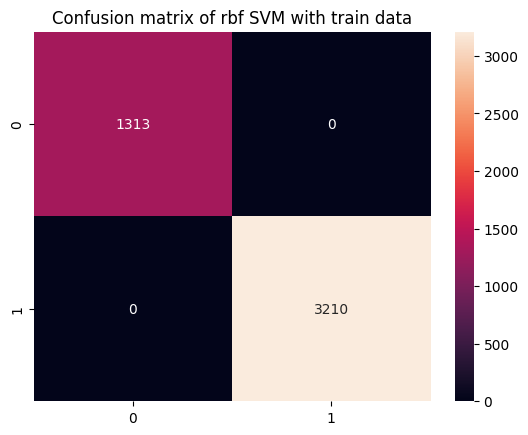

In [128]:
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of rbf SVM with train data')

print(classification_report(y_train, y_pred_train))

**Outcome**:

The data is overfitted. The sample N has increased. Cross validation should be checked. 

**Computing cross-validated metrics**:

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import column_or_1d

y_train = column_or_1d(y_train, warn=True)

scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

<ipython-input-129-1f2af4741464>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_train = column_or_1d(y_train, warn=True)


0.98 accuracy with a standard deviation of 0.00


###DecisionTreeClassifier:

In [156]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf_en = clf.fit(X_train,y_train) # from the training set
clf_en.score(X_test, y_test)# returns the mean accuracy of test data

1.0

In [157]:
from sklearn import metrics 

#Predict the response for test dataset
y_pred_en = clf_en.predict(X_test)

# Model Accuracy:

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 1.0000


[Text(0.5, 0.75, 'x[13] <= -1.851\nentropy = 0.869\nsamples = 4523\nvalue = [1313, 3210]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1313\nvalue = [1313, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 3210\nvalue = [0, 3210]')]

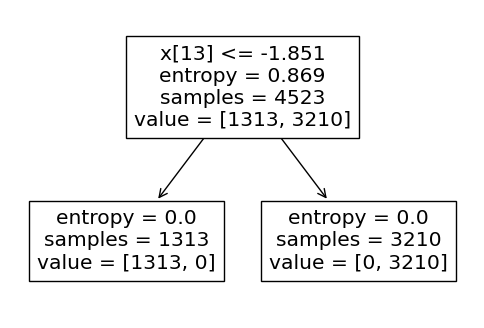

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score

y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
plt.figure(figsize=(6,4))

tree.plot_tree(clf_en.fit(X_train, y_train))

In [166]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 537    0]
 [   0 1402]]


It looks like that DecisionTree validation is more precise, however the difference is not that significant: 0.98 vs 1.00. 

Before sptil, the entropy value was 0.869 which indicated that the samples at that node were somewhat mixed or impure, meaning they are not perfectly separated into distinct classes. It shoudl be 0.. but at the same time. We were able to separate the samples into two highly pure subsets, with one subset containing only class 1 samples and the other subset containing only class 2 samples. 